<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

In [4]:
pwd = %pwd
if pwd != 'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\data':
    %cd ./data


C:\Users\Admin\Documents\GitHub\DS_Final_project\data


In [5]:
file_list = os.listdir()
data_tmp = []
for file in file_list:
    df = pd.read_csv(file)
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)
%cd ..

C:\Users\Admin\Documents\GitHub\DS_Final_project


In [6]:
final_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,510252,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1623080,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,366681,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,817138,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,510747,$532.18M,7.8


In [7]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,79500,79500,79500,79500.000000,79500,79050,36140,7.950000e+04,4529,79500.000000
unique,61473,553,57834,NaN,1016,58958,21051,NaN,1278,NaN
top,Run,0,Add a Plot,NaN,Documentary,Add a Plot,Kevin Dunn,NaN,$0.01M,NaN
freq,15,7607,8458,NaN,5446,6029,98,NaN,342,NaN
mean,NaN,NaN,NaN,2014.174742,NaN,NaN,NaN,4.769354e+03,NaN,4.101481
std,NaN,NaN,NaN,25.861114,NaN,NaN,NaN,3.709526e+04,NaN,3.431680
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,1.300000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,1.920000e+02,NaN,7.200000


In [8]:
df = final_df.copy()
df = df[df.rating != 0]
df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,510252,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1623080,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,366681,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,817138,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,510747,$532.18M,7.8


In [9]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [10]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

train_X_df.head().index

Int64Index([40980, 44997, 615, 20521, 13402], dtype='int64')

In [11]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34267 entries, 40980 to 73596
Data columns (total 9 columns):
title       34267 non-null object
runtime     34267 non-null object
des         34267 non-null object
date        34267 non-null int64
genre       34267 non-null object
cast        33958 non-null object
director    25306 non-null object
vote        34267 non-null int64
gross       3176 non-null object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


In [12]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14687 entries, 67851 to 23902
Data columns (total 9 columns):
title       14687 non-null object
runtime     14687 non-null object
des         14687 non-null object
date        14687 non-null int64
genre       14687 non-null object
cast        14546 non-null object
director    10812 non-null object
vote        14687 non-null int64
gross       1353 non-null object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [13]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
40980,Ghost Light,102,A dark comedy about a disgruntled summer-s...,2018,"Comedy, Horror","Roger Bart, Tom Riley, Shannyn Sossamon, Danie...",John Stimpson,292,NaN
44997,Nothing Good Ever Happens,91,Our film is about Neil who is a painter an...,2016,"Comedy, Drama","Erin R. Ryan, Al Snow, Marylee Osborne, Iabou ...",Henrique Couto,74,NaN
615,Life on the Line,97,A crew of men who do the high-wire work of...,2015,"Action, Drama","John Travolta, Kate Bosworth, Devon Sawa, Gil ...",David Hackl,4113,NaN
20521,Cross Ange: Tenshi to Ryuu no Rondo,0,The first season follows the growth of a p...,2014,"Animation, Action, Romance","Emily Neves, Brenda Valdivia, Katelyn Barr, Am...",NaN,279,NaN
13402,Blunderkind,20,"in 1988, 12-year-old boy genius Henry Jame...",2011,"Short, Adventure, Comedy","Wes Robertson, Bridger Zadina, Drake Johnston,...",Zak Mechanic,64,NaN


In [14]:
#df = df.dropna(axis=0)
#df = df.drop_duplicates()

In [15]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [16]:
genre_rating_df.head()

,genre,rating
40980,"Comedy, Horror",4.8
44997,"Comedy, Drama",5.5
615,"Action, Drama",5.2
20521,"Animation, Action, Romance",7.2
13402,"Short, Adventure, Comedy",7.0


Counter({'Comedy': 11819, 'Documentary': 9068, 'Drama': 8967, 'Action': 8841, 'Short': 6888, 'Adventure': 6677, 'Crime': 5147, 'Animation': 4990, 'Romance': 4173, 'Biography': 3641, 'Family': 1499, 'Thriller': 1476, 'Horror': 1357, 'Fantasy': 1301, 'History': 1279, 'Sci-Fi': 1079, 'Music': 972, 'Mystery': 853, 'Sport': 595, 'Musical': 206, 'News': 203, 'Reality-TV': 200, 'War': 195, 'Talk-Show': 88, 'Western': 84, 'Game-Show': 55})
len =  26


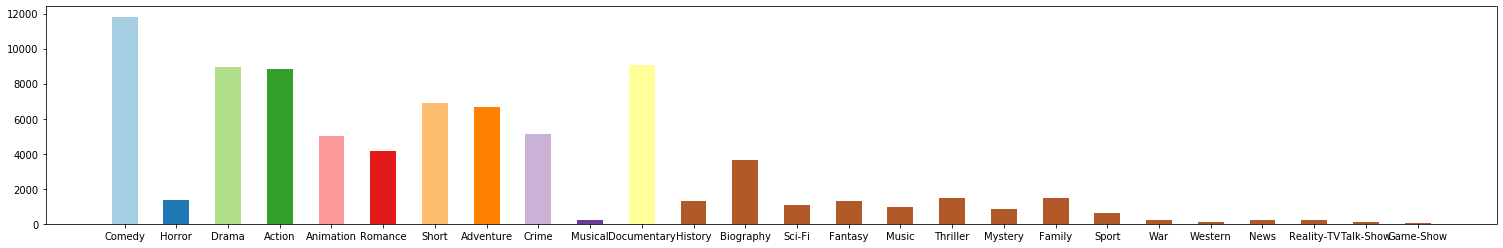

In [17]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

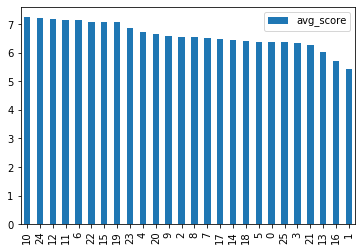

In [18]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [19]:
print(hist_df)

          genre  avg_score
10  Documentary   7.256341
24    Talk-Show   7.236364
12    Biography   7.200192
11      History   7.163096
6         Short   7.158188
22         News   7.088670
15        Music   7.071091
19        Sport   7.069916
23   Reality-TV   6.868500
4     Animation   6.739078
20          War   6.669231
9       Musical   6.574757
2         Drama   6.567336
8         Crime   6.548164
7     Adventure   6.530028
17      Mystery   6.482884
14      Fantasy   6.457802
18       Family   6.420147
5       Romance   6.372825
0        Comedy   6.372138
25    Game-Show   6.361818
3        Action   6.330992
21      Western   6.288095
13       Sci-Fi   6.021316
16     Thriller   5.717818
1        Horror   5.445615


- GENRE to number

In [20]:
#TF-IDF 

corpus = genre_rating_df["genre"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_genre = []
for i in range(len(genre_rating_df)):
    list_sum_genre.append(tfidf[i].sum())

In [21]:
sum_genre = pd.DataFrame(list_sum_genre)
sum_genre.isnull().values.any()


False

In [22]:
#add column into df
train_X_df["sum_genre"] = pd.Series(list_sum_genre).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre
40980,Ghost Light,102,A dark comedy about a disgruntled summer-s...,2018,"Comedy, Horror","Roger Bart, Tom Riley, Shannyn Sossamon, Danie...",John Stimpson,292,NaN,1.337358
44997,Nothing Good Ever Happens,91,Our film is about Neil who is a painter an...,2016,"Comedy, Drama","Erin R. Ryan, Al Snow, Marylee Osborne, Iabou ...",Henrique Couto,74,NaN,1.411443
615,Life on the Line,97,A crew of men who do the high-wire work of...,2015,"Action, Drama","John Travolta, Kate Bosworth, Devon Sawa, Gil ...",David Hackl,4113,NaN,1.414207
20521,Cross Ange: Tenshi to Ryuu no Rondo,0,The first season follows the growth of a p...,2014,"Animation, Action, Romance","Emily Neves, Brenda Valdivia, Katelyn Barr, Am...",NaN,279,NaN,1.720803
13402,Blunderkind,20,"in 1988, 12-year-old boy genius Henry Jame...",2011,"Short, Adventure, Comedy","Wes Robertson, Bridger Zadina, Drake Johnston,...",Zak Mechanic,64,NaN,1.722098


- CAST to number

In [24]:
#replace NaN element in cast to "other"
train_X_df["cast"] = train_X_df["cast"].fillna("other_cast");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:

cast_rating_df = train_X_df["cast"].to_frame().join(train_y_sr)

from collections import Counter

list_cast = list(cast_rating_df.cast)
unique_cast = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_cast += g.strip().split(", ")
dict_cast = Counter(unique_cast)

print("len = ",len(dict_cast))


len =  67484


In [26]:
occur_cast = Counter(dict_cast.values())  #Số lần xuất hiện - Số diễn viên

occur_cast = {k: v for k, v in sorted(occur_cast.items(), key=lambda item: item[1], reverse = True)}

dict(list(occur_cast.items())[:10])

{1: 45893,
 2: 12206,
 3: 3987,
 4: 1803,
 5: 1025,
 6: 617,
 7: 408,
 8: 300,
 9: 251,
 10: 189}

In [27]:
cast_info = dict_cast.items()
cast_info = sorted(cast_info, key=lambda tup: tup[1], reverse=True)
cast_info[:10] #Từng diễn viên tương ứng với số lần đóng phim


[('other_cast', 309),
 ('Grey Griffin', 110),
 ('Troy Baker', 109),
 ('Laura Bailey', 96),
 ('Eric Bauza', 68),
 ('Tara Strong', 65),
 ('John DiMaggio', 60),
 ('Eric Roberts', 59),
 ('Fred Tatasciore', 57),
 ('Sean Astin', 57)]

# Nhận xét: Những diễn viên xuất hiện nhiều lần, thông thường được mọi người xem là hay. Những diễn viên xuất hiện ít, thường là những người mới hoặc diễn tệ.


In [28]:
#TF-IDF 

corpus = cast_rating_df["cast"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_cast = []
for i in range(len(cast_rating_df)):
    list_sum_cast.append(tfidf[i].sum())

In [29]:
sum_cast = pd.DataFrame(list_sum_cast)
sum_cast.isnull().values.any()


False

In [30]:
#add column into df
train_X_df["sum_cast"] = pd.Series(list_sum_cast).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast
40980,Ghost Light,102,A dark comedy about a disgruntled summer-s...,2018,"Comedy, Horror","Roger Bart, Tom Riley, Shannyn Sossamon, Danie...",John Stimpson,292,NaN,1.337358,2.760240
44997,Nothing Good Ever Happens,91,Our film is about Neil who is a painter an...,2016,"Comedy, Drama","Erin R. Ryan, Al Snow, Marylee Osborne, Iabou ...",Henrique Couto,74,NaN,1.411443,2.740402
615,Life on the Line,97,A crew of men who do the high-wire work of...,2015,"Action, Drama","John Travolta, Kate Bosworth, Devon Sawa, Gil ...",David Hackl,4113,NaN,1.414207,2.746048
20521,Cross Ange: Tenshi to Ryuu no Rondo,0,The first season follows the growth of a p...,2014,"Animation, Action, Romance","Emily Neves, Brenda Valdivia, Katelyn Barr, Am...",NaN,279,NaN,1.720803,2.782097
13402,Blunderkind,20,"in 1988, 12-year-old boy genius Henry Jame...",2011,"Short, Adventure, Comedy","Wes Robertson, Bridger Zadina, Drake Johnston,...",Zak Mechanic,64,NaN,1.722098,2.788380


- DIRECTOR to number

In [32]:
#replace NaN element in cast to "other"
train_X_df["director"] = train_X_df["director"].fillna("other_director");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:

director_rating_df = train_X_df["director"].to_frame().join(train_y_sr)

from collections import Counter

list_director = list(director_rating_df.director)
unique_director = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_director += g.strip().split(", ")
dict_director = Counter(unique_director)

print("len = ",len(dict_director))

len =  67484


In [34]:
#TF-IDF 

corpus = director_rating_df["director"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_director = []
for i in range(len(director_rating_df)):
    list_sum_director.append(tfidf[i].sum())

In [35]:
sum_director = pd.DataFrame(list_sum_director)
sum_director.isnull().values.any()


False

In [36]:
#add column into df
train_X_df["sum_director"] = pd.Series(list_sum_director).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast,sum_director
40980,Ghost Light,102,A dark comedy about a disgruntled summer-s...,2018,"Comedy, Horror","Roger Bart, Tom Riley, Shannyn Sossamon, Danie...",John Stimpson,292,NaN,1.337358,2.760240,1.366023
44997,Nothing Good Ever Happens,91,Our film is about Neil who is a painter an...,2016,"Comedy, Drama","Erin R. Ryan, Al Snow, Marylee Osborne, Iabou ...",Henrique Couto,74,NaN,1.411443,2.740402,1.414214
615,Life on the Line,97,A crew of men who do the high-wire work of...,2015,"Action, Drama","John Travolta, Kate Bosworth, Devon Sawa, Gil ...",David Hackl,4113,NaN,1.414207,2.746048,1.333922
20521,Cross Ange: Tenshi to Ryuu no Rondo,0,The first season follows the growth of a p...,2014,"Animation, Action, Romance","Emily Neves, Brenda Valdivia, Katelyn Barr, Am...",other_director,279,NaN,1.720803,2.782097,1.000000
13402,Blunderkind,20,"in 1988, 12-year-old boy genius Henry Jame...",2011,"Short, Adventure, Comedy","Wes Robertson, Bridger Zadina, Drake Johnston,...",Zak Mechanic,64,NaN,1.722098,2.788380,1.407825


- GROSS to number

In [38]:
#replace NaN element in cast to "other"
train_X_df["gross"] = train_X_df["gross"].fillna("0.0");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:

#define money
money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
for i in range(len(train_X_df)):
    
    train_X_df.gross.iloc[i] = float(re.findall("\d+\.\d+", train_X_df.gross.iloc[i])[0]) * money[train_X_df.gross.iloc[i][-1]]

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [40]:

dict_gross = Counter(train_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

{0.0: 31267,
 10000.0: 234,
 20000.0: 140,
 40000.0: 94,
 30000.0: 93,
 50000.0: 49,
 60000.0: 47,
 70000.0: 47,
 90000.0: 44,
 100000.0: 38,
 120000.0: 35,
 110000.0: 29,
 80000.0: 29,
 130000.0: 23,
 200000.0: 21,
 150000.0: 20,
 140000.0: 18,
 160000.0: 18,
 230000.0: 18,
 290000.0: 15}

# Nhận thấy: số lượng "0.0" chiếm quá nhiều, gây chênh lệnh lớn. Sử dụng median để thay thế

In [41]:
imp = SimpleImputer(missing_values = 0, strategy='median')
train_X_df["gross"] = imp.fit_transform(train_X_df[["gross"]]).ravel()


dict_gross = Counter(train_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{1460000.0: 31267,
 10000.0: 234,
 20000.0: 140,
 40000.0: 94,
 30000.0: 93,
 50000.0: 49,
 60000.0: 47,
 70000.0: 47,
 90000.0: 44,
 100000.0: 38,
 120000.0: 35,
 110000.0: 29,
 80000.0: 29,
 130000.0: 23,
 200000.0: 21,
 150000.0: 20,
 140000.0: 18,
 160000.0: 18,
 230000.0: 18,
 290000.0: 15}

In [42]:
train_X_df = train_X_df.drop(['cast',"genre","director","date"], axis = 1)
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
40980,Ghost Light,102,A dark comedy about a disgruntled summer-s...,292,1460000.0,1.337358,2.760240,1.366023
44997,Nothing Good Ever Happens,91,Our film is about Neil who is a painter an...,74,1460000.0,1.411443,2.740402,1.414214
615,Life on the Line,97,A crew of men who do the high-wire work of...,4113,1460000.0,1.414207,2.746048,1.333922
20521,Cross Ange: Tenshi to Ryuu no Rondo,0,The first season follows the growth of a p...,279,1460000.0,1.720803,2.782097,1.000000
13402,Blunderkind,20,"in 1988, 12-year-old boy genius Henry Jame...",64,1460000.0,1.722098,2.788380,1.407825


# scaling

In [43]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
40980,Ghost Light,102,A dark comedy about a disgruntled summer-s...,292,1460000.0,1.337358,2.760240,1.366023
44997,Nothing Good Ever Happens,91,Our film is about Neil who is a painter an...,74,1460000.0,1.411443,2.740402,1.414214
615,Life on the Line,97,A crew of men who do the high-wire work of...,4113,1460000.0,1.414207,2.746048,1.333922
20521,Cross Ange: Tenshi to Ryuu no Rondo,0,The first season follows the growth of a p...,279,1460000.0,1.720803,2.782097,1.000000
13402,Blunderkind,20,"in 1988, 12-year-old boy genius Henry Jame...",64,1460000.0,1.722098,2.788380,1.407825


In [44]:
scl = StandardScaler()
train_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]]=scl.fit_transform(train_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]])

In [45]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
40980,Ghost Light,0.914315,A dark comedy about a disgruntled summer-s...,-0.157489,-0.115744,-0.580581,0.367226,-0.042816
44997,Nothing Good Ever Happens,0.683783,Our film is about Neil who is a painter an...,-0.162184,-0.115744,-0.318696,0.323584,0.080718
615,Life on the Line,0.809528,A crew of men who do the high-wire work of...,-0.075198,-0.115744,-0.308926,0.336005,-0.125106
20521,Cross Ange: Tenshi to Ryuu no Rondo,-1.223348,The first season follows the growth of a p...,-0.157769,-0.115744,0.774859,0.415311,-0.981101
13402,Blunderkind,-0.804199,"in 1988, 12-year-old boy genius Henry Jame...",-0.162399,-0.115744,0.779437,0.429133,0.064341


# Xử lý tương tự trên tập validation

In [46]:
genre_rating_df = val_X_df["genre"].to_frame().join(val_y_sr)

In [47]:
genre_rating_df.head()

,genre,rating
67851,Documentary,8.2
71636,"Drama, Romance",5.5
33089,"Documentary, Biography, History",8.0
73429,"Drama, Romance",7.3
64601,Documentary,6.6


Counter({'Comedy': 5066, 'Documentary': 3927, 'Drama': 3798, 'Action': 3708, 'Short': 2953, 'Adventure': 2887, 'Crime': 2204, 'Animation': 2115, 'Romance': 1790, 'Biography': 1647, 'Family': 646, 'Horror': 622, 'Thriller': 592, 'Fantasy': 585, 'History': 554, 'Music': 433, 'Sci-Fi': 393, 'Mystery': 381, 'Sport': 236, 'News': 84, 'Musical': 82, 'War': 81, 'Reality-TV': 76, 'Talk-Show': 41, 'Western': 25, 'Game-Show': 15})
len =  26


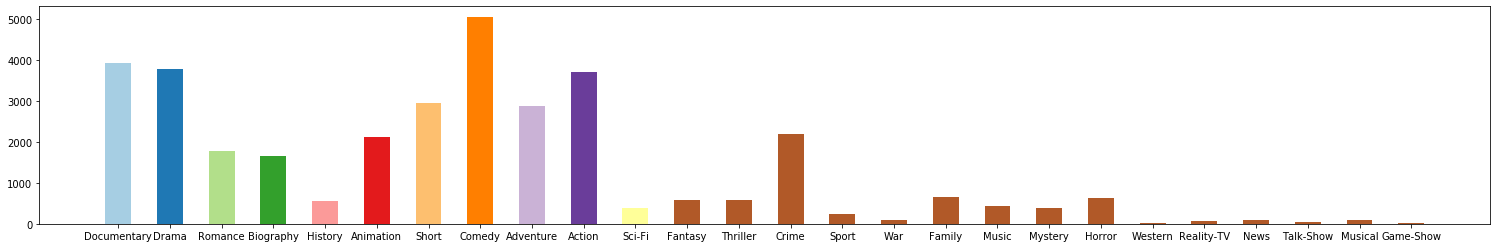

In [48]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

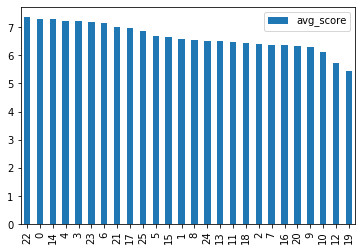

In [49]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [50]:
print(hist_df)

          genre  avg_score
22         News   7.365476
0   Documentary   7.293405
14        Sport   7.277119
4       History   7.232491
3     Biography   7.220704
23    Talk-Show   7.175610
6         Short   7.156891
21   Reality-TV   7.007895
17        Music   6.976674
25    Game-Show   6.860000
5     Animation   6.687991
15          War   6.638272
1         Drama   6.570906
8     Adventure   6.536855
24      Musical   6.526829
13        Crime   6.505082
11      Fantasy   6.481709
18      Mystery   6.432546
2       Romance   6.393296
7        Comedy   6.368298
16       Family   6.367337
20      Western   6.348000
9        Action   6.300836
10       Sci-Fi   6.114504
12     Thriller   5.736993
19       Horror   5.460772


- GENRE to number

In [51]:
#TF-IDF 

corpus = genre_rating_df["genre"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_genre = []
for i in range(len(genre_rating_df)):
    list_sum_genre.append(tfidf[i].sum())

In [52]:
sum_genre = pd.DataFrame(list_sum_genre)
sum_genre.isnull().values.any()


False

In [53]:
#add column into df
val_X_df["sum_genre"] = pd.Series(list_sum_genre).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre
67851,Polar Bears: Spy on the Ice,0,Spycams sneak within a paw's swipe of the ...,2011,Documentary,Star:David Tennant,John Downer,195,NaN,1.000000
71636,The Surface,79,The struggle of a young man to slowly crea...,2015,"Drama, Romance","Harry Hains, Michael Redford Carney, Nicholas ...",Michael J. Saul,178,NaN,1.400973
33089,Freaks in Love,98,"25 years in the world of underground rock,...",2011,"Documentary, Biography, History","Tomas Antona, Jello Biafra, Martin Bisi, Glenn...","David Koslowski, Skizz Cyzyk",11,NaN,1.682093
73429,Falling,89,ASLAN has 24 hours to change the memories ...,2016,"Drama, Romance","Birol Ünel, Emma Suárez, Gabriel Tineo, Celine...",Ana Rodríguez Rosell,27,NaN,1.400973
64601,First Comes Love,105,"First comes love, then comes marriage, the...",2013,Documentary,"Nina Davenport, Eric E. Oleson",Nina Davenport,299,NaN,1.000000


- CAST to number

In [55]:
#replace NaN element in cast to "other"
val_X_df["cast"] = val_X_df["cast"].fillna("other_cast");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:

cast_rating_df = val_X_df["cast"].to_frame().join(val_y_sr)

from collections import Counter

list_cast = list(cast_rating_df.cast)
unique_cast = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_cast += g.strip().split(", ")
dict_cast = Counter(unique_cast)

print("len = ",len(dict_cast))


len =  36155


In [57]:
occur_cast = Counter(dict_cast.values())  #Số lần xuất hiện - Số diễn viên

occur_cast = {k: v for k, v in sorted(occur_cast.items(), key=lambda item: item[1], reverse = True)}

dict(list(occur_cast.items())[:10])

{1: 28247,
 2: 4891,
 3: 1456,
 4: 637,
 5: 282,
 6: 220,
 7: 122,
 8: 96,
 9: 50,
 11: 42}

In [58]:
cast_info = dict_cast.items()
cast_info = sorted(cast_info, key=lambda tup: tup[1], reverse=True)
cast_info[:10] #Từng diễn viên tương ứng với số lần đóng phim


[('other_cast', 141),
 ('Grey Griffin', 45),
 ('Troy Baker', 42),
 ('Laura Bailey', 35),
 ('Eric Roberts', 33),
 ('Eric Bauza', 32),
 ('Fred Tatasciore', 28),
 ('Steve Blum', 27),
 ('Tom Kenny', 26),
 ('Tara Strong', 24)]

# Nhận xét: Những diễn viên xuất hiện nhiều lần, thông thường được mọi người xem là hay. Những diễn viên xuất hiện ít, thường là những người mới hoặc diễn tệ.


In [59]:
#TF-IDF 

corpus = cast_rating_df["cast"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_cast = []
for i in range(len(cast_rating_df)):
    list_sum_cast.append(tfidf[i].sum())

In [60]:
sum_cast = pd.DataFrame(list_sum_cast)
sum_cast.isnull().values.any()


False

In [61]:
#add column into df
val_X_df["sum_cast"] = pd.Series(list_sum_cast).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast
67851,Polar Bears: Spy on the Ice,0,Spycams sneak within a paw's swipe of the ...,2011,Documentary,Star:David Tennant,John Downer,195,NaN,1.000000,1.631957
71636,The Surface,79,The struggle of a young man to slowly crea...,2015,"Drama, Romance","Harry Hains, Michael Redford Carney, Nicholas ...",Michael J. Saul,178,NaN,1.400973,3.068645
33089,Freaks in Love,98,"25 years in the world of underground rock,...",2011,"Documentary, Biography, History","Tomas Antona, Jello Biafra, Martin Bisi, Glenn...","David Koslowski, Skizz Cyzyk",11,NaN,1.682093,2.787747
73429,Falling,89,ASLAN has 24 hours to change the memories ...,2016,"Drama, Romance","Birol Ünel, Emma Suárez, Gabriel Tineo, Celine...",Ana Rodríguez Rosell,27,NaN,1.400973,2.789182
64601,First Comes Love,105,"First comes love, then comes marriage, the...",2013,Documentary,"Nina Davenport, Eric E. Oleson",Nina Davenport,299,NaN,1.000000,1.947770


- DIRECTOR to number

In [63]:
#replace NaN element in cast to "other"
val_X_df["director"] = val_X_df["director"].fillna("other_director");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:

director_rating_df = val_X_df["director"].to_frame().join(val_y_sr)

from collections import Counter

list_director = list(director_rating_df.director)
unique_director = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_director += g.strip().split(", ")
dict_director = Counter(unique_director)

print("len = ",len(dict_director))

len =  36155


In [65]:
#TF-IDF 

corpus = director_rating_df["director"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_director = []
for i in range(len(director_rating_df)):
    list_sum_director.append(tfidf[i].sum())

In [66]:
sum_director = pd.DataFrame(list_sum_director)
sum_director.isnull().values.any()


False

In [67]:
#add column into df
val_X_df["sum_director"] = pd.Series(list_sum_director).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast,sum_director
67851,Polar Bears: Spy on the Ice,0,Spycams sneak within a paw's swipe of the ...,2011,Documentary,Star:David Tennant,John Downer,195,NaN,1.000000,1.631957,1.360294
71636,The Surface,79,The struggle of a young man to slowly crea...,2015,"Drama, Romance","Harry Hains, Michael Redford Carney, Nicholas ...",Michael J. Saul,178,NaN,1.400973,3.068645,1.365534
33089,Freaks in Love,98,"25 years in the world of underground rock,...",2011,"Documentary, Biography, History","Tomas Antona, Jello Biafra, Martin Bisi, Glenn...","David Koslowski, Skizz Cyzyk",11,NaN,1.682093,2.787747,1.944230
73429,Falling,89,ASLAN has 24 hours to change the memories ...,2016,"Drama, Romance","Birol Ünel, Emma Suárez, Gabriel Tineo, Celine...",Ana Rodríguez Rosell,27,NaN,1.400973,2.789182,1.729177
64601,First Comes Love,105,"First comes love, then comes marriage, the...",2013,Documentary,"Nina Davenport, Eric E. Oleson",Nina Davenport,299,NaN,1.000000,1.947770,1.413284


- GROSS to number

In [69]:
#replace NaN element in cast to "other"
val_X_df["gross"] = val_X_df["gross"].fillna("0.0");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:

#define money
money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
for i in range(len(val_X_df)):
    
    val_X_df.gross.iloc[i] = float(re.findall("\d+\.\d+", val_X_df.gross.iloc[i])[0]) * money[val_X_df.gross.iloc[i][-1]]

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:

dict_gross = Counter(val_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

{0.0: 13403,
 10000.0: 108,
 20000.0: 67,
 30000.0: 43,
 40000.0: 40,
 50000.0: 20,
 60000.0: 17,
 70000.0: 17,
 100000.0: 16,
 120000.0: 15,
 90000.0: 12,
 110000.0: 10,
 80000.0: 9,
 150000.0: 9,
 160000.0: 8,
 290000.0: 8,
 130000.0: 8,
 170000.0: 7,
 210000.0: 7,
 240000.0: 6}

# Nhận thấy: số lượng "0.0" chiếm quá nhiều, gây chênh lệnh lớn. Sử dụng median để thay thế

In [72]:
imp = SimpleImputer(missing_values = 0, strategy='median')
val_X_df["gross"] = imp.fit_transform(val_X_df[["gross"]]).ravel()


dict_gross = Counter(val_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{2185000.0: 13403,
 10000.0: 108,
 20000.0: 67,
 30000.0: 43,
 40000.0: 40,
 50000.0: 20,
 60000.0: 17,
 70000.0: 17,
 100000.0: 16,
 120000.0: 15,
 90000.0: 12,
 110000.0: 10,
 80000.0: 9,
 150000.0: 9,
 160000.0: 8,
 290000.0: 8,
 130000.0: 8,
 170000.0: 7,
 210000.0: 7,
 240000.0: 6}

In [73]:
val_X_df = val_X_df.drop(['cast',"genre","director","date"], axis = 1)
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
67851,Polar Bears: Spy on the Ice,0,Spycams sneak within a paw's swipe of the ...,195,2185000.0,1.000000,1.631957,1.360294
71636,The Surface,79,The struggle of a young man to slowly crea...,178,2185000.0,1.400973,3.068645,1.365534
33089,Freaks in Love,98,"25 years in the world of underground rock,...",11,2185000.0,1.682093,2.787747,1.944230
73429,Falling,89,ASLAN has 24 hours to change the memories ...,27,2185000.0,1.400973,2.789182,1.729177
64601,First Comes Love,105,"First comes love, then comes marriage, the...",299,2185000.0,1.000000,1.947770,1.413284


# scaling

In [74]:
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
67851,Polar Bears: Spy on the Ice,0,Spycams sneak within a paw's swipe of the ...,195,2185000.0,1.000000,1.631957,1.360294
71636,The Surface,79,The struggle of a young man to slowly crea...,178,2185000.0,1.400973,3.068645,1.365534
33089,Freaks in Love,98,"25 years in the world of underground rock,...",11,2185000.0,1.682093,2.787747,1.944230
73429,Falling,89,ASLAN has 24 hours to change the memories ...,27,2185000.0,1.400973,2.789182,1.729177
64601,First Comes Love,105,"First comes love, then comes marriage, the...",299,2185000.0,1.000000,1.947770,1.413284


In [75]:
scl = StandardScaler()
val_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]]=scl.fit_transform(val_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]])

In [76]:
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
67851,Polar Bears: Spy on the Ice,-1.241767,Spycams sneak within a paw's swipe of the ...,-0.162826,-0.122281,-1.773028,-2.122177,-0.060722
71636,The Surface,0.440242,The struggle of a young man to slowly crea...,-0.163178,-0.122281,-0.349435,1.043132,-0.046224
33089,Freaks in Love,0.844776,"25 years in the world of underground rock,...",-0.166629,-0.122281,0.648638,0.424259,1.554616
73429,Falling,0.653154,ASLAN has 24 hours to change the memories ...,-0.166298,-0.122281,-0.349435,0.427419,0.959717
64601,First Comes Love,0.993814,"First comes love, then comes marriage, the...",-0.160677,-0.122281,-1.773028,-1.426378,0.085865


# To CSV

In [77]:
train_X_df.to_csv("./processed_data/train_X_df.csv",index = False, header = True)
train_y_sr.to_csv("./processed_data/train_y_sr.csv",index = False, header = True)
val_X_df.to_csv("./processed_data/val_X_df.csv",index = False, header = True)
val_y_sr.to_csv("./processed_data/val_y_sr.csv",index = False, header = True)

In [78]:
train_X_df = pd.read_csv("./processed_data/train_X_df.csv")
train_y_sr = pd.read_csv("./processed_data/train_y_sr.csv")


In [79]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
0,Ghost Light,0.914315,A dark comedy about a disgruntled summer-s...,-0.157489,-0.115744,-0.580581,0.367226,-0.042816
1,Nothing Good Ever Happens,0.683783,Our film is about Neil who is a painter an...,-0.162184,-0.115744,-0.318696,0.323584,0.080718
2,Life on the Line,0.809528,A crew of men who do the high-wire work of...,-0.075198,-0.115744,-0.308926,0.336005,-0.125106
3,Cross Ange: Tenshi to Ryuu no Rondo,-1.223348,The first season follows the growth of a p...,-0.157769,-0.115744,0.774859,0.415311,-0.981101
4,Blunderkind,-0.804199,"in 1988, 12-year-old boy genius Henry Jame...",-0.162399,-0.115744,0.779437,0.429133,0.064341
